# Threshold Predictor

From https://archive.ics.uci.edu/dataset/601/ai4i+2020+predictive+maintenance+dataset
or https://www.kaggle.com/datasets/stephanmatzka/predictive-maintenance-dataset-ai4i-2020/data

We learned :

- tool wear failure (TWF): the tool will be replaced of fail at a randomly selected tool wear time between 200 - 240 mins (120 times in our dataset). At this point in time, the tool is replaced 69 times, and fails 51 times (randomly assigned).

- heat dissipation failure (HDF): heat dissipation causes a process failure, if the difference between air- and process temperature is below 8.6 K and the tools rotational speed is below 1380 rpm. This is the case for 115 data points.

- power failure (PWF): the product of torque and rotational speed (in rad/s) equals the power required for the process. If this power is below 3500 W or above 9000 W, the process fails, which is the case 95 times in our dataset.

- overstrain failure (OSF): if the product of tool wear and torque exceeds 11,000 minNm for the L product variant (12,000 M, 13,000 H), the process fails due to overstrain. This is true for 98 datapoints.

- random failures (RNF): each process has a chance of 0,1 % to fail regardless of its process parameters. This is the case for only 5 datapoints, less than could be expected for 10,000 datapoints in our dataset.

If at least one of the above failure modes is true, the process fails and the 'machine failure' label is set to 1. It is therefore not transparent to the machine learning method, which of the failure modes has caused the process to fail.

However, in real life, we never know the actual rules that determine the failures and we depend only on our training data to detect the thresholds.

Hence, let's create a predictor model based on training data only.

We will use visual plot to find our thresholds


## Load Data And Dependencies

In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Let's load our data into X and y for both train and test

In [30]:
X_train=pd.read_csv('X_train.csv')
y_train=pd.read_csv('y_train.csv')
X_test=pd.read_csv('X_test.csv')
y_test=pd.read_csv('y_test.csv')
df_train=pd.concat([X_train, y_train], axis=1)
df_test=pd.concat([X_test, y_test], axis=1)

Let's check the output columns ['Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF'] and make sure they are the same for train and test

In [31]:
print("Training Data Columns:")
print(X_train.columns)
print("Testing Data Columns:")
print(X_test.columns)
print("Training Labels Columns:")   
print(y_train.columns)

print(y_test.columns)

Training Data Columns:
Index(['Type', 'Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Type Num',
       'Strain [minNm]', 'Power (W)', 'Temperature Difference (K)'],
      dtype='object')
Testing Data Columns:
Index(['Type', 'Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Type Num',
       'Strain [minNm]', 'Power (W)', 'Temperature Difference (K)'],
      dtype='object')
Training Labels Columns:
Index(['Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF'], dtype='object')
Index(['Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF'], dtype='object')


All is good 

## Detect Thresholds

### Random Failure

Random failure cannot be predicted and as such, we cannot find any threshold

### Tool Wear Failure  

Tool Wear Failure is related to "Tool wear [min]"



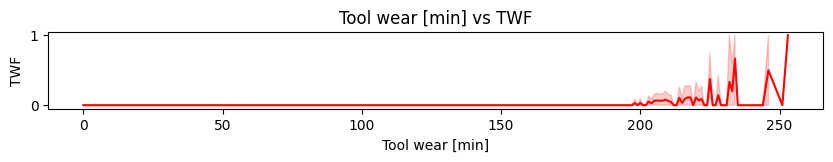

In [32]:
plt.figure(figsize=(10, 1)) # Set the size of the resulting plot
sns.lineplot(data=df_train, x='Tool wear [min]', y='TWF', color='red')
plt.xlabel('Tool wear [min]')
plt.ylabel('TWF')
plt.title(f'Tool wear [min] vs TWF')
plt.show()

In [33]:
min_tool_wear_for_failure=df_train[df_train['TWF'] == 1]['Tool wear [min]'].min()
print(f'Minimum tool wear for failure: {min_tool_wear_for_failure}')

Minimum tool wear for failure: 198


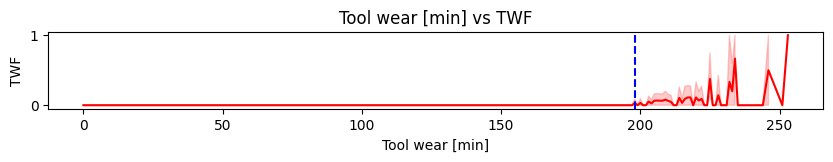

In [34]:
plt.figure(figsize=(10, 1)) # Set the size of the resulting plot
sns.lineplot(data=df_train, x='Tool wear [min]', y='TWF', color='red')
plt.axvline(x=min_tool_wear_for_failure, color='blue', linestyle='--', label=f'Min Tool Wear for Failure {min_tool_wear_for_failure}')
plt.xlabel('Tool wear [min]')
plt.ylabel('TWF')
plt.title(f'Tool wear [min] vs TWF')
plt.show()

Our rule for TWF will be 

TWF fail if 'Tool wear [min]' > 198

### Strain And Over Strain Failure

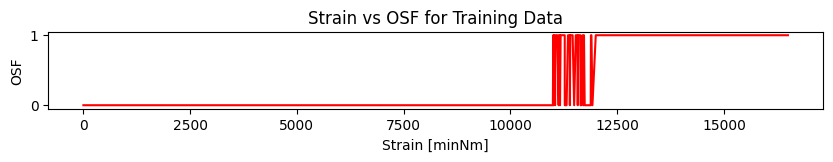

In [35]:
plt.figure(figsize=(10, 1)) # Set the size of the resulting plot
sns.lineplot(data=df_train, x='Strain [minNm]', y='OSF', color='red')
plt.xlabel('Strain [minNm]')
plt.ylabel('OSF')
plt.title(f'Strain vs OSF for Training Data')
plt.show()

In [36]:
min_strain_for_failure=df_train[df_train['OSF'] == 1]['Strain [minNm]'].min()
print(f'Minimum strain for failure: {min_strain_for_failure}')
max_strain_for_non_failure=df_train[df_train['OSF'] == 0]['Strain [minNm]'].max()
print(f'Maximum strain for non failure: {max_strain_for_non_failure}')

Minimum strain for failure: 11003.2
Maximum strain for non failure: 11919.8


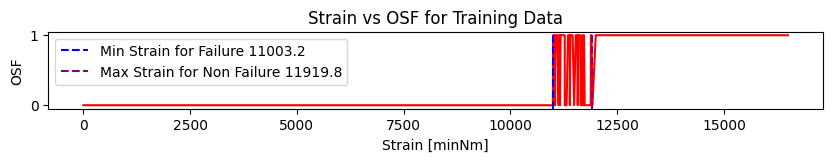

In [37]:
plt.figure(figsize=(10, 1)) # Set the size of the resulting plot
sns.lineplot(data=df_train, x='Strain [minNm]', y='OSF', color='red')
plt.axvline(x=min_strain_for_failure, color='blue', linestyle='--', label=f'Min Strain for Failure {min_strain_for_failure}')
plt.axvline(x=max_strain_for_non_failure, color='purple', linestyle='--', label=f'Max Strain for Non Failure {max_strain_for_non_failure}')
plt.xlabel('Strain [minNm]')
plt.ylabel('OSF')
plt.title(f'Strain vs OSF for Training Data')
plt.legend()
plt.show()

For OSF Failure based on train data, without insight we can use simple threshold 

OSF fail if Strain (minNm) >= 110003.2

### Power and Power Failure

Text(0.5, 1.0, 'Power vs PWF')

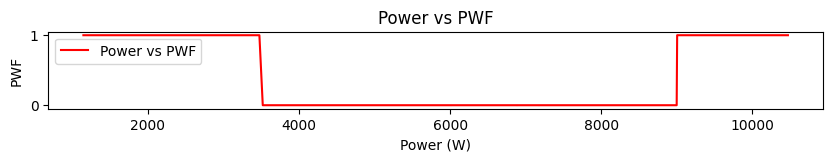

In [38]:
plt.figure(figsize=(10, 1))
sns.lineplot(data=df_train, x='Power (W)', y='PWF', color='red', label='Power vs PWF')
plt.xlabel('Power (W)')
plt.ylabel('PWF')
plt.title('Power vs PWF')

In [39]:
min_power=df_train['Power (W)'].min()
min_power_for_failure=df_train[df_train['PWF'] == 1]['Power (W)'].min()
print(f'Minimum power: {min_power}')
print(f'Minimum power for failure: {min_power_for_failure}')
min_power_for_non_failure=df_train[df_train['PWF'] == 0]['Power (W)'].min()
print(f'Minimum power for non failure: {min_power_for_non_failure}')
max_power_for_non_failure=df_train[df_train['PWF'] == 0]['Power (W)'].max()
print(f'Maximum power for non failure: {max_power_for_non_failure}')


Minimum power: 1148.4406104462846
Minimum power for failure: 1148.4406104462846
Minimum power for non failure: 3521.78819652723
Maximum power for non failure: 8998.024014705741


Text(0.5, 1.0, 'Power vs PWF')

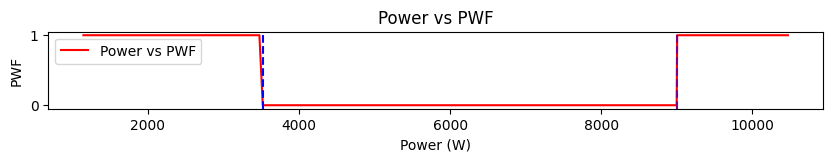

In [40]:
plt.figure(figsize=(10, 1))
sns.lineplot(data=df_train, x='Power (W)', y='PWF', color='red', label='Power vs PWF')
plt.axvline(x=min_power_for_non_failure, color='blue', linestyle='--', label=f'Min Power for Non Failure {min_power_for_non_failure}')
plt.axvline(x=max_power_for_non_failure, color='purple', linestyle='--', label=f'Max Power for Non Failure {max_power_for_non_failure}')
plt.xlabel('Power (W)')
plt.ylabel('PWF')
plt.title('Power vs PWF')


Here we found that Power Failure Thresholds based on our training data.

PWF fail if Power (W) <= 3521.78819652723 or Power (W) >= 8998.024014705741

### Temperature Difference And Heat Dissipation Failure

Text(0.5, 1.0, 'Heat Dissipation Failure')

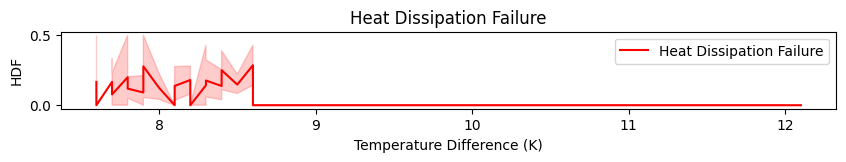

In [41]:
plt.figure(figsize=(10, 1))
sns.lineplot(data=df_train, x='Temperature Difference (K)', y='HDF', color='red', label='Heat Dissipation Failure')
plt.title('Heat Dissipation Failure')

In [42]:
max_temp_diff_for_failure=df_train[df_train['HDF'] == 1]['Temperature Difference (K)'].max()
print(f'Maximum temperature difference for failure: {max_temp_diff_for_failure}')

Maximum temperature difference for failure: 8.599999999999966


Text(0.5, 1.0, 'Heat Dissipation Failure')

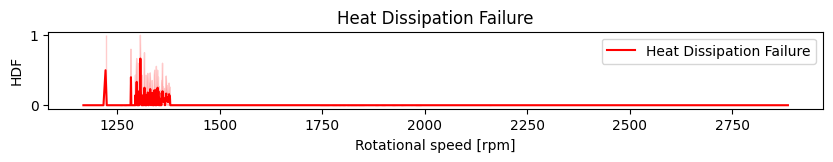

In [43]:
plt.figure(figsize=(10, 1))
sns.lineplot(data=df_train, x='Rotational speed [rpm]', y='HDF', color='red', label='Heat Dissipation Failure')
plt.title('Heat Dissipation Failure')

In [45]:
max_rotational_speed_for_failure=df_train[df_train['HDF'] == 1]['Rotational speed [rpm]'].max()
print(f'Minimum rotational speed for failure: {max_rotational_speed_for_failure}')

Minimum rotational speed for failure: 1379


Text(0.5, 1.0, 'Heat Dissipation Failure')

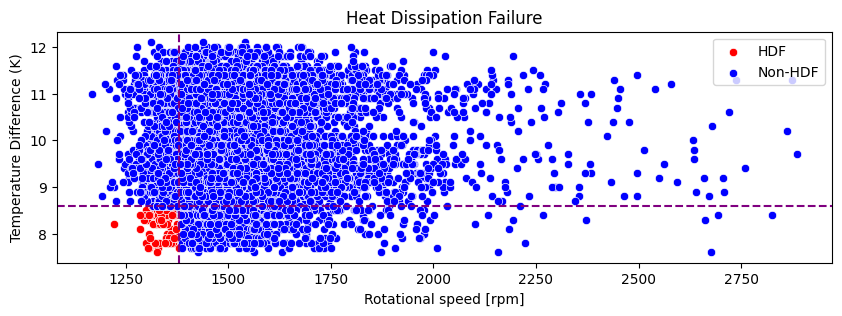

In [46]:
plt.figure(figsize=(10, 3))
sns.scatterplot(data=df_train[df_train['HDF']==1], x='Rotational speed [rpm]', y='Temperature Difference (K)', color='red', label='HDF')
sns.scatterplot(data=df_train[df_train['HDF']==0], x='Rotational speed [rpm]', y='Temperature Difference (K)', color='blue', label='Non-HDF')
plt.axvline(x=max_rotational_speed_for_failure, color='purple', linestyle='--', label='Rotational speed 0 rpm')
plt.axhline(y=max_temp_diff_for_failure, color='purple', linestyle='--', label='Temperature Difference 0 K')
plt.title('Heat Dissipation Failure')

Here we are able to use threshold to detect failure rule for HDF

Fail if Rotational Speed (rpm) <= 1379 and Temperature Difference <=8.599999999999966


## Threshold Predictor Model

Let us create a predictor model using the thresholds that we discovered.

As a recap, here are our rules that we discovered:
- TWF fail if Tool Wear (Min) > 198
- OSF fail if Strain (minNm) >= 110003.2
- HDF Fail if Rotational Speed (rpm) <= 1379 and Temperature Difference <=8.599999999999966
- PWF fail if Power (W) <= 3521.78819652723 or Power (W) >= 8998.024014705741

In [50]:
# TWF fail if Tool Wear (Min) > 198
# OSF fail if Strain (minNm) >= 110003.2
# HDF Fail if Rotational Speed (rpm) <= 1379 and Temperature Difference <=8.599999999999966
# PWF fail if Power (W) <= 3521.78819652723 or Power (W) >= 8998.024014705741
class ThresholdPredictor:
    def __init__(self):
        self.power_feature = 'Power (W)'
        self.power_low_threshold = 3521.78819652723 # the minimum power where PWF Occurs
        self.power_high_threshold = 8998.024014705741 # the maximum power where PWF Occurs
        self.strain_feature = 'Strain [minNm]'
        self.strain_threshold = 110003.2# the minimum strain where OSF Occurs
        self.temperature_feature = 'Temperature Difference (K)'
        self.temperature_threshold = 8.599999999999966 # the minimum temperature difference when HDF occurs
        self.rotational_speed_feature = 'Rotational speed [rpm]'
        self.rotational_speed_threshold = 1379 # the maximum rotational speed when HDF occurs
        self.tool_wear_feature = 'Tool wear [min]'
        self.tool_wear_threshold = 198 # the minimum tool wear when TWF occurs
        self.y_columns = ['Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF']
    def fit(self, X, y):
        pass  # No fitting needed for threshold-based model

    def predict(self, X):
        df = pd.DataFrame(columns=self.y_columns)
        df['PWF'] = np.where(
            (X[self.power_feature] <= self.power_low_threshold) |
            (X[self.power_feature] >= self.power_high_threshold), 1, 0)
        df['HDF'] = np.where(
            (X[self.rotational_speed_feature] <= self.rotational_speed_threshold) &
            (X[self.temperature_feature] <= self.temperature_threshold), 1, 0)
        df['OSF'] = np.where(
            (X[self.strain_feature] >= self.strain_threshold), 1, 0)
        df['RNF'] = pd.Series(0, index=X.index)  # Assuming RNF is not used in this model
        df['TWF'] = np.where(
            (X[self.tool_wear_feature] > self.tool_wear_threshold), 1, 0)
        df['Machine failure'] = df[['TWF', 'HDF', 'PWF', 'OSF']].max(axis=1)
        return df
    def score(self, X, y):
        predictions = self.predict(X)
        return (predictions == y).mean()
    
threshold_predictor = ThresholdPredictor()
print("Threshold Predictor Model Score on Training Data: \n", threshold_predictor.score(X_train, y_train))
print("Threshold Predictor Model Score on Test Data: \n", threshold_predictor.score(X_test, y_test))


Threshold Predictor Model Score on Training Data: 
 Machine failure    0.922750
TWF                0.919250
HDF                1.000000
PWF                0.999750
OSF                0.990625
RNF                0.997875
dtype: float64
Threshold Predictor Model Score on Test Data: 
 Machine failure    0.9275
TWF                0.9210
HDF                1.0000
PWF                0.9995
OSF                0.9885
RNF                0.9990
dtype: float64


In [51]:
from sklearn.metrics import fbeta_score, recall_score, precision_score, accuracy_score
threshold_predictor = ThresholdPredictor()
y_train_pred = threshold_predictor.predict(X_train)
y_test_pred = threshold_predictor.predict(X_test)
f2_train=fbeta_score(y_train, y_train_pred, beta=2, average='macro')
f2_test=fbeta_score(y_test, y_test_pred, beta=2, average='macro')
train_recall=recall_score(y_train, y_train_pred, average='macro')
test_recall=recall_score(y_test, y_test_pred, average='macro')
train_precision=precision_score(y_train, y_train_pred, average='macro', zero_division=0)
test_precision=precision_score(y_test, y_test_pred, average='macro', zero_division=0)
train_accuracy=accuracy_score(y_train, y_train_pred)
test_accuracy=accuracy_score(y_test, y_test_pred)
print("--------------------------------------------------")
print("Train Data Metrics:")
print(f"F2 Score on Training Data: {f2_train}")
print(f"Recall on Training Data: {train_recall}")
print(f"Precision on Training Data: {train_precision}")
print(f"Accuracy on Training Data: {train_accuracy}")
print("--------------------------------------------------")
print("Test Data Metrics:")
print(f"F2 Score on Test Data: {f2_test}")
print(f"Recall on Test Data: {test_recall}")
print(f"Precision on Test Data: {test_precision}")
print(f"Accuracy on Test Data: {test_accuracy}")


--------------------------------------------------
Train Data Metrics:
F2 Score on Training Data: 0.47603020260389
Recall on Training Data: 0.643808030498678
Precision on Training Data: 0.38795059667484133
Accuracy on Training Data: 0.913875
--------------------------------------------------
Test Data Metrics:
F2 Score on Test Data: 0.4728942893333865
Recall on Test Data: 0.6547619047619048
Precision on Test Data: 0.38213845774821387
Accuracy on Test Data: 0.917


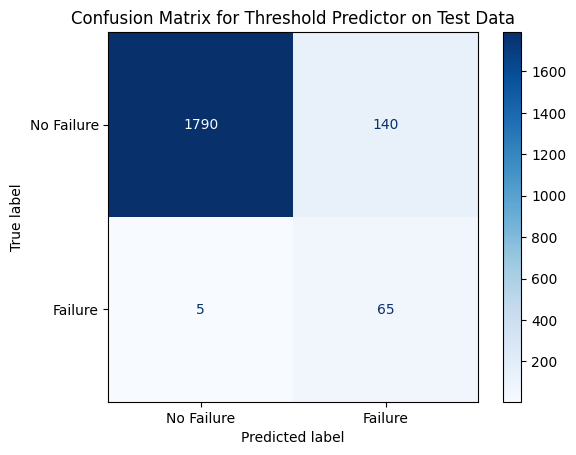

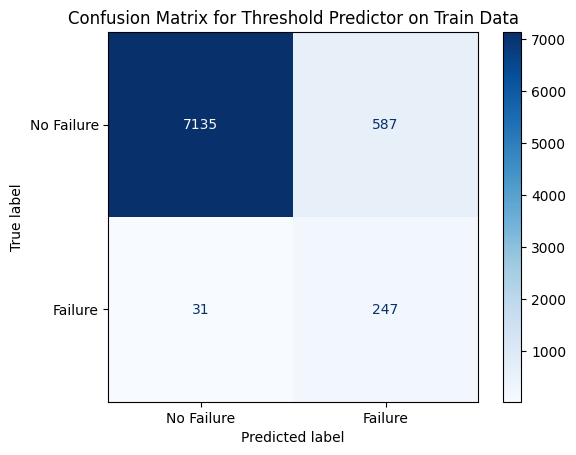

In [52]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test['Machine failure'], y_test_pred['Machine failure'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Failure', 'Failure'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Threshold Predictor on Test Data')
plt.show()

cm = confusion_matrix(y_train['Machine failure'], y_train_pred['Machine failure'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Failure', 'Failure'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Threshold Predictor on Train Data')
plt.show()

## Conclusion

Our threshold based predictor is able to provide predictive maintenance capability for our dataset.

Eventhough it does not capture all the rules that we learn from our dataset documentation, it is reasonably close.

- TWF fail if Tool Wear (Min) > 198
- OSF fail if Strain (minNm) >= 11019.2
- HDF Fail if Rotational Speed (rpm) <= 1379 and Temperature Difference <=8.599999999999966
- PWF fail if Power (W) <= 3521.78819652723 or Power (W) >= 8998.024014705741

It is not capable to detect the relationship between machine type (Low, Medium, High) quality but it does detect the lowest threshold for Over-Strain failure


On Test Data, we found it produce:
- F2 Score on Test Data: 0.6339069175009053
- Recall on Test Data: 0.830952380952381
- Precision on Test Data: 0.5071941262902918
- Accuracy on Test Data: 0.918

It is very accurate as majority of our data are non-failure.
However, its precision is not very good as it is only 51%